In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
test_df = pd.read_csv("../results/PandaReachObjEnv-v1/PPO/metrics/0.monitor.csv", skiprows=1)

In [106]:
test_df['t_diff'] = test_df.t.diff()
diff_i = test_df[test_df.t_diff < 0].index
for i in range(1, len(diff_i)):
    test_df.loc[(test_df.index >= diff_i[i-1]) & (test_df.index < diff_i[i]), 't'] += test_df.t[diff_i[i-1]-1]
test_df.loc[(test_df.index >= diff_i[-1]), 't'] += test_df.t[diff_i[-1]-1]

In [113]:
diff_i[-1]

1120

In [16]:
def get_total_df(gym_id: str) -> pd.DataFrame:
    """
    Read all *.csv files from given path and merge them into one dataframe.
    """
    df_list = []
    for i in range(12):
        df = pd.read_csv(f"../results/{gym_id}/{i}.monitor.csv", skiprows=1)
        df['t_diff'] = df.t.diff()
        t_diff_index = df[df.t_diff < 0].index
        if len(t_diff_index) > 0:
            for j in range(1, len(t_diff_index)):
                df.loc[(df.index >= t_diff_index[j-1]) & (df.index < t_diff_index[j]), 't'] += df.t[t_diff_index[j-1]-1]
            df.loc[(df.index >= t_diff_index[-1]), 't'] += df.t[t_diff_index[-1]-1]
        # df_list.append(pd.read_csv(f"../results/{gym_id}/metrics/{i}.monitor.csv", skiprows=1))
        df_list.append(df)
    result_df = df_list[0]
    for i in range(1, 12):
        result_df = pd.concat([result_df, df_list[i]], ignore_index=True)
    result_df = result_df.sort_values(by=['t'], ascending=True).reset_index(drop=True)
    return result_df

def plot_rewards_and_episodes(df, window_size=100):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].plot(df.l_cum, df.rolling(window=window_size).mean().r)
    ax[0].grid('on')
    
    ax[1].plot(df.l_cum, df.rolling(window=window_size).mean().l)
    ax[1].grid('on')

In [153]:
plt.style.use('seaborn-v0_8-white')

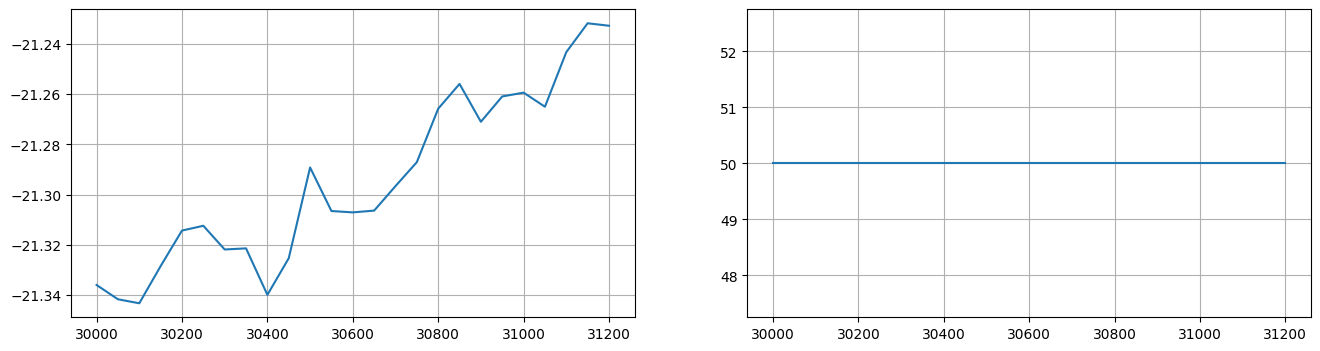

In [23]:
df = get_total_df("PandaSlide-v3/DDPG")
df['l_cum'] = df.l.cumsum()
plot_rewards_and_episodes(df, window_size=600)

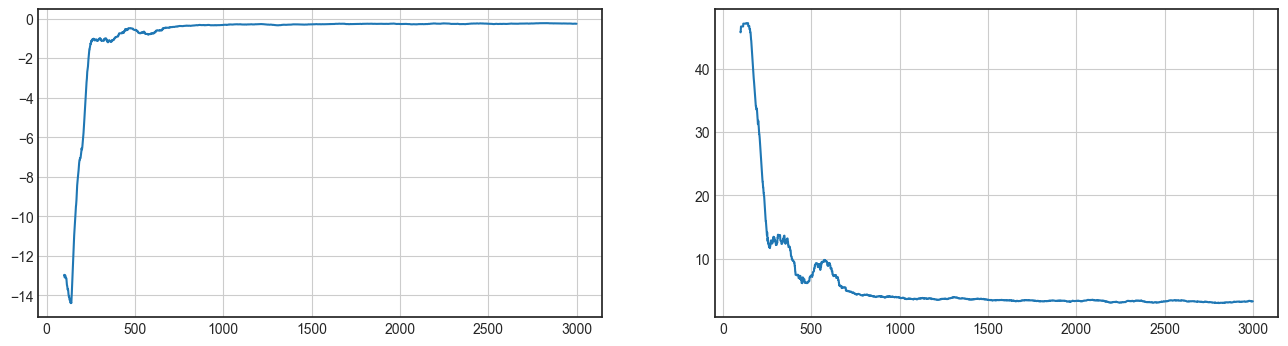

In [358]:
df = get_total_df("PandaReach-v3/DDPG")
plot_rewards_and_episodes(df, window_size=100)

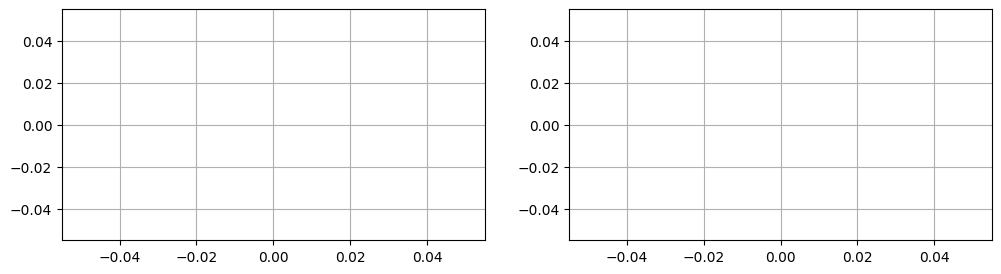

In [128]:
df = get_total_df("PandaReachObjEnv-v0/PPO")
plot_rewards_and_episodes(df)

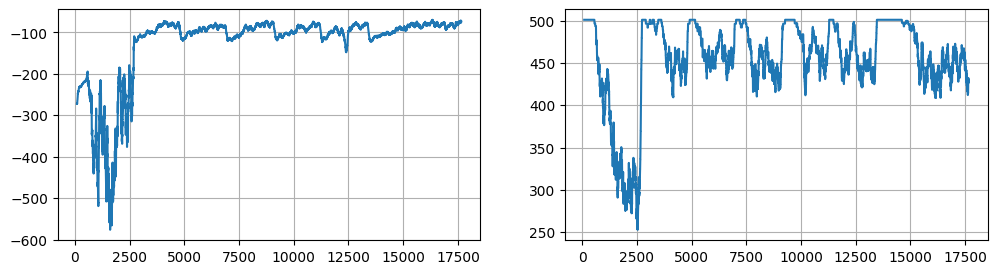

In [127]:
df = get_total_df("PandaReachObjEnv-v1/PPO")
plot_rewards_and_episodes(df)

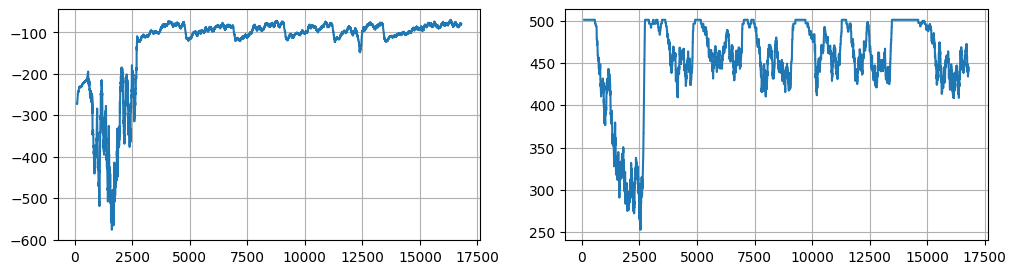

In [123]:
df = get_total_df("PandaReachObjEnv-v1/PPO")
plot_rewards_and_episodes(df)

In [23]:
df = pd.DataFrame([1, 2, 3, 4, 5, 6], index=[100, 29, 29, 234, 1, 29],
                  columns=['A'])

In [24]:
df.sort_index()

,A
1,5
29,2
29,3
29,6
100,1
234,4
